In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import ticker
# from statsmodels.tsa.stattools import adfuller, acf, pacf
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM




In [14]:
time_series_data = pd.read_csv(r'D:\project\data\Date.csv',
                               index_col="Date", parse_dates=True)
time_series_data = pd.DataFrame({"Date": time_series_data.index, "Sales": time_series_data['Sales']})
time_series_data.set_index("Date", inplace=True)
print(time_series_data.head())

scaler = MinMaxScaler()
scaler.fit(time_series_data)
sales_scaled = scaler.transform(time_series_data)
time_series_data['SalesScaled'] = sales_scaled
print(time_series_data.tail(10))

                  Sales
Date                   
2013-01-01    87.284560
2013-01-02  6233.030493
2013-01-03  5693.112108
2013-01-04  5954.218834
2013-01-05  5337.751570
                  Sales  SalesScaled
Date                                
2015-07-22  5480.168610     0.387284
2015-07-23  5997.370404     0.424427
2015-07-24  5920.470852     0.418904
2015-07-25  5400.597309     0.381570
2015-07-26   256.381166     0.012143
2015-07-27  9602.952466     0.683358
2015-07-28  8174.953363     0.580808
2015-07-29  7623.284305     0.541190
2015-07-30  7891.348879     0.560441
2015-07-31  9067.033184     0.644871


NameError: name 'houseSales' is not defined

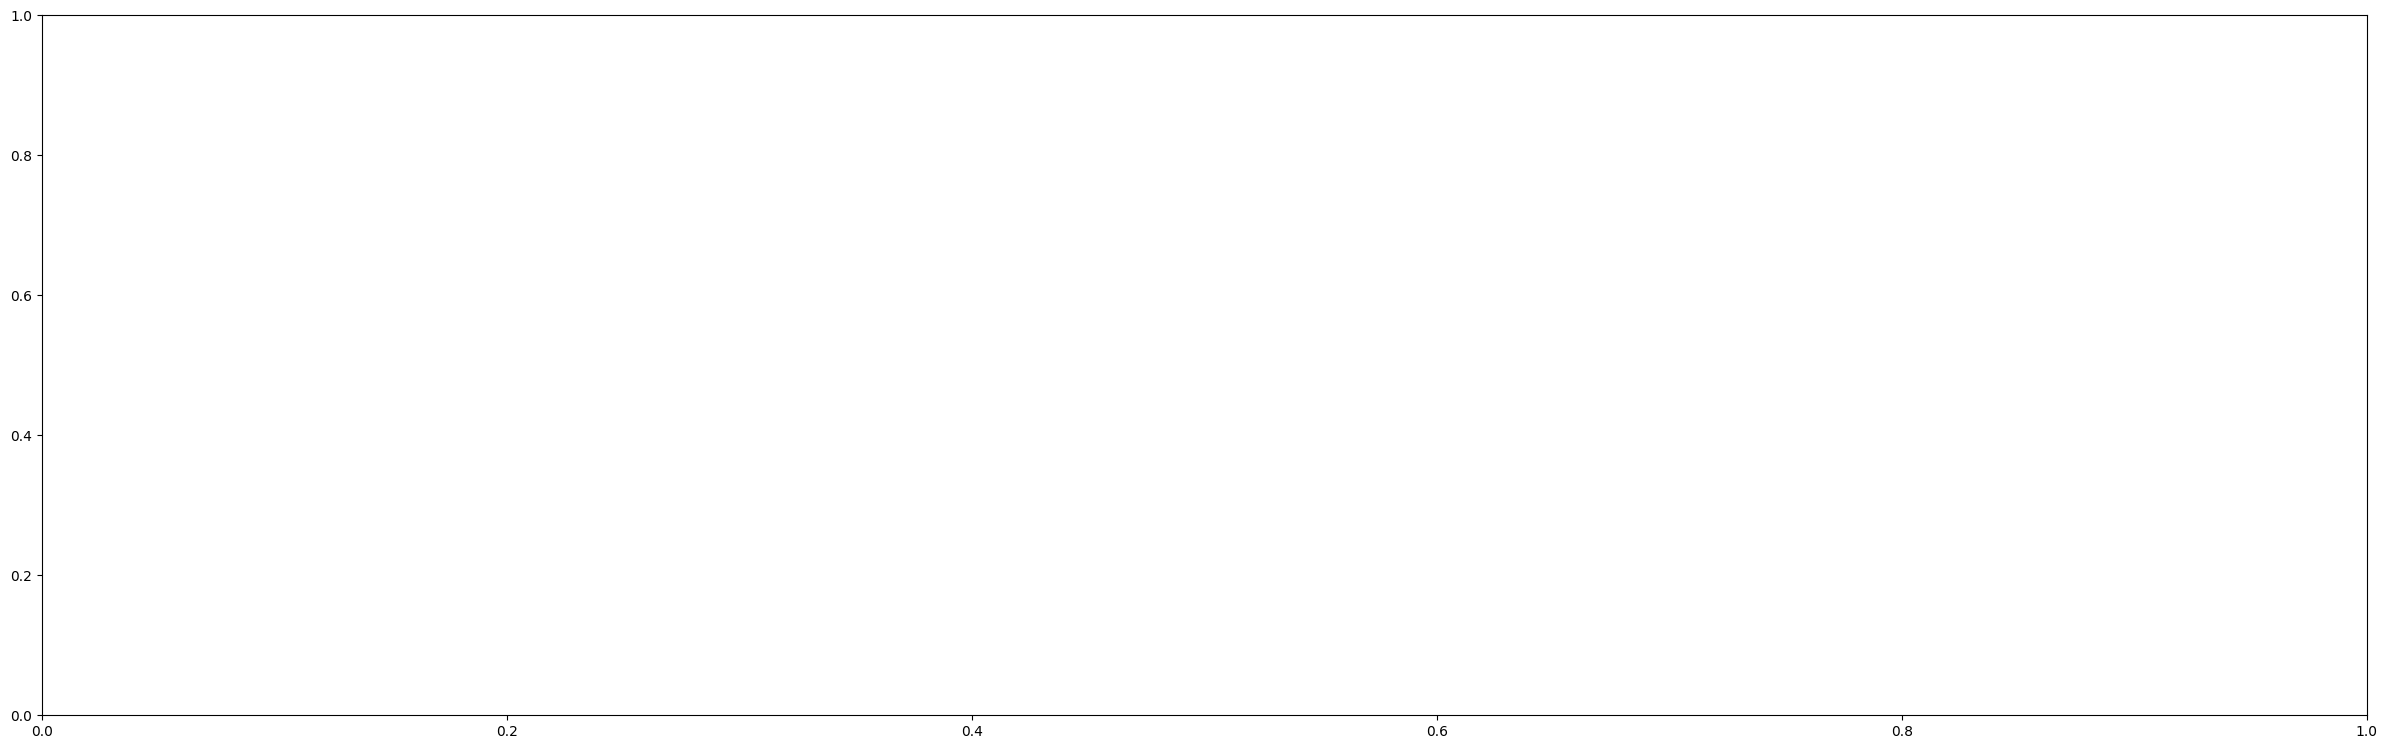

In [15]:
fig = plt.figure()
gs = GridSpec(2, 1, figure=fig)

fig.set_figheight(20)
fig.set_figwidth(30)
fig.tight_layout(pad=15)

M = 100
xticks = ticker.MaxNLocator(M)

ax1 = fig.add_subplot(gs[0,0])
ax1.plot(houseSales.index, houseSales.Sales, 'b-')
ax1.xaxis.set_major_locator(xticks)
ax1.tick_params(labelrotation=90)
ax1.set_xlabel('Date')
ax1.set_ylabel('Thousands of Units')
ax1.title.set_text('Time Series Plot of House Sales')
ax1.grid(True)

ax2 = fig.add_subplot(gs[1,0])
ax2.plot(houseSales.index, houseSales.HouseSalesScaled, 'g-')
ax2.xaxis.set_major_locator(xticks)
ax2.tick_params(labelrotation=90)
ax2.set_xlabel('Date')
ax2.set_ylabel('Scaled Units')
ax2.title.set_text('Time Series Plot of Min Max Scaled House Sales')